<a href="https://colab.research.google.com/github/victor-soeiro/IntroPython-UERJ/blob/master/Projetos/Projeto2Apresentacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 2

##**Montagem de uma Rede Neural usando a arquitetura Perceptron**

**Autores** Gabriela Gonçalves, Úrsula Goulart e Victor Soeiro.

[Arquivo do Projeto](https://github.com/malbouis/Python_intro/blob/master/aulas/projetos/projeto2_perceptrons.ipynb)

---

## Perceptron

Um Perceptron é uma arquitetura de Redes Neurais que utiliza apenas uma camada de processamento, ou melhor, apenas um neurônio. Esse neurônio utiliza uma função de ativação para o processamos do somatório dos inputs com seus pesos e retorna um output binário.

<img src="https://images.deepai.org/glossary-terms/perceptron-6168423.jpg" width=500 />

Para o projeto, vamos utilizar a função de ativação *Heaviside StepFunction*. Em linguagem Python, poderiamos escrevê-la como,

```
def heaviside(summation, b):
    return 1 if summation > b else 0
```

Onde, b nomeamos como bias. 

Essa desigualdade pode ser escrita em relação do somatório dos inputs com os pesos mais o bias, sendo agora maior ou menor que zero. 

Portanto,

$ \phi(x) = 
\begin{cases}
   1 & \text{se $\sum_{i=1}^{N} x_i \omega_i + b > 0$} \\
   0 & \text{se $\sum_{i=1}^{N} x_i \omega_i + b \leq 0$}
\end{cases}$

Para incorporar o bias no somatório, o chamaremos de peso zero, $\omega_0$, com um input, $x_0$, igual a 1. 

**Obs.:** O produto dos pesos com os inputs é um produto matricial devido serem arrays.

Para cada conjunto de inputs do Perceptron, que chamaremos de features, compararemos o output, chamado de y, com o valor do dataset, chamado de label. A partir dessas comparaçãos, ajustaremos os pesos até que tenha a menor diferença para uma melhor classificação do Perceptron. 

```
w = w + learning_rate * (label - y) * x
```

Onde, o *learning_rate* é a taxa de aprendizado do Perceptron.



## Iris Dataset

Antes de criarmos o nosso Perceptron, pré-processaremos o dataset da flor iris usando o módulo Pandas e o Matplotlib. Ambos os módulos tem como propósito análise e visualização de dados. Em conjunto com o módulo Numpy formam uma ferramenta poderosa para o processamento de dados.

Portanto, vamos importar esses módulos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Para obtermos o dataset da flor iris, usaremos a função *read_csv()*, sendo o argumento um URL, para baixar o dataset no formato .csv.

In [2]:
iris_dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)

Para verificar se foi lido o dataset corretamente, verificaremos os primeiros cinco dados da tabela usando a função *head()*.

In [3]:
iris_dataset.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Para o projeto consideraremos apenas o comprimento e largura da pétala da Iris, que no caso seriam as colunas 2 e 3. Além disso, iremos utilizar no total 150 dados, onde, em sequência, 50 dados serão da flor Iris Setosa, 50 dados da flor Iris Versicolor e 50 dados da flor Iris Virginica. 

O nosso Perceptron será treinado para prever se é ou não é uma flor Iris Setosa, logo, converteremos a classificação da flor em dois inteiros, 1 para Iris Setosa e 0 para os outros tipos.

In [4]:
x = iris_dataset.iloc[0:150, [2, 3]].values

In [5]:
y = np.where(iris_dataset.iloc[0:150, 4].values == "Iris-setosa", 1, 0)

Visualizaremos os dados utilizando um gráfico de dispersão.

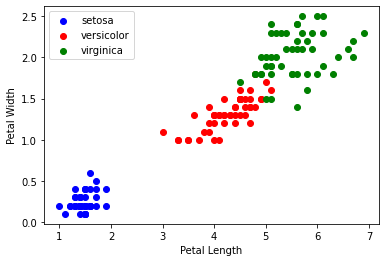

In [6]:
plt.scatter(x[:50, 0], x[:50, 1], color="blue", label="setosa")
plt.scatter(x[50:100, 0], x[50:100, 1], color="red", label="versicolor")
plt.scatter(x[100:, 0], x[100:, 1], color="green", label="virginica")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(loc="upper left")
plt.show()

Agora criaremos o nosso Perceptron.

## Perceptron Model

A classe Perceptron terá duas funções essenciais, *predict* e *train*. Esses dois métodos são a implementação da função de ativação e do treinamento do Perceptron. Portanto,

In [11]:
class Perceptron:
    def __init__(self, n_of_inputs, threshold=100, learning_rate=.01):
        """
        Método de inicialização da classe Perceptron.

        :param n_of_inputs: Número de features do Perceptron.
        :param threshold: Número de iterações do método de treino do Perceptron.
        :param learning_rate: Taxa de aprendizado do Perceptron.
        """

        self.bias = 0
        self.weights = np.zeros(n_of_inputs)
        self.threshold = threshold
        self.learning_rate = learning_rate
    
    def predict(self, inputs):
        """
        Método de implementação da função ativação, usando a função
        Heaviside StepFunction, do Perceptron.

        :param inputs: Array com o conjunto de features.
        """
        return np.heaviside(np.dot(inputs, self.weights) + self.bias, 0)
    
    def train(self, training_inputs, labels):
        """
        Método de treino do Perceptron.

        :param training_inputs: Array com o conjunto de dados para o treinamento.
        :param labels: Array com o conjunto de dados esperado.
        """
        for _ in range(self.threshold):
            for n in range(len(training_inputs)):
                prediction = self.predict(training_inputs[n])
                self.weights += self.learning_rate * (labels[n] - prediction) * training_inputs[n]
                self.bias += self.learning_rate * (labels[n] - prediction)

Treinaremos o nosso Perceptron a partir dos dados processados na seção anterior e iremos prever se dado o input com o comprimento e largura da petála gera um output esperado. 

Para uma Iris Setosa, temos os seguintes valores, respectivamente, para o comprimento e largura da petála, 1 e 0,5. Por isso, o Perceptron deve retornar True, ou 1, caso seja uma Iris Setosa.

In [12]:
iris_perceptron = Perceptron(2)
iris_perceptron.train(x, y)
iris_perceptron.predict([1, 0.5])

1.0

Como esperado, o valor retornado foi 1!! Agora devemos compará-lo com algum outro Perceptron para verificá-lo.

Há um módulo muito utilizado na ciência dos dados chamado de sklearn, que já possui implementado uma classe do Perceptron. O utilizaremos para comparar os resultados obtidos. 

In [14]:
from sklearn.linear_model import Perceptron as sklearnPerceptron

iris_sklearn_perceptron = sklearnPerceptron()
iris_sklearn_perceptron.fit(x, y)
iris_sklearn_perceptron.predict([[1, 0.5]])

array([1])

Novamente, como esperado, o valor do Perceptron do módulo sklearn resultou em 1, também.

O Perceptron torna-se uma arquitetura de redes neurais interessante ao trabalhar com classificações binárias e linearmente separáveis, como a o ajuste linear de uma reta.

O algoritmo do Perceptron começa a falhar quando o dataset para o seu aprendizado não é linearmente separável, tal que, não conseguirá classificar o dataset corretamente. Outra limitação é a classificação binária, na qual nem todos casos torna-se aplicável.